<a href="https://colab.research.google.com/github/Elignesin/SureStart/blob/main/Feb18_MNIST_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating a Neural Network to classify handwritten digits  
The goal of this notebook is to create a basic neural network to classify handwritten digits from the MNIST dataset, to evaluate the performance of the neural netowrk, and to use the neural network to predict on a test set.  

This notebook is drawn from and builds on the https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/.

In [14]:
#First, we need to load the necessary packages
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

Training Set Shapes: X=(60000, 28, 28), y = (60000,)
Test Set Shapes: X=(10000, 28, 28), y = (10000,)


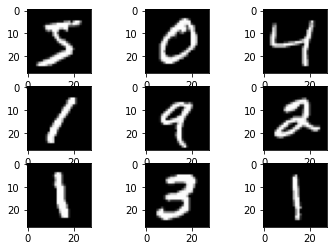

In [2]:
#Next, we need to load the mnist dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

#We also want to summarize the data we loaded
print(f'Training Set Shapes: X={trainX.shape}, y = {trainy.shape}')
print(f'Test Set Shapes: X={testX.shape}, y = {testy.shape}')

#We can also plot some images to see what we're working with
for i in range(9): #We're going to print 9 images
  plt.subplot(330+ 1 + i)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
#Next, we need to encode the target values and reshape the training data

#Reshape training data
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

#Encode testing data using one-hot encoding
train_y = to_categorical(trainy)
test_y = to_categorical(testy)

In [5]:
#We also need to normalize the training and testing X data
#We do this by dividing by 255 (which places all values within 0 and 1)
trainX_norm = trainX.astype('float32') / 255.0
testX_norm = testX.astype('float32') / 255.0

In [6]:
#We're lastly going to split our training data into a training and a validation set
X_train, X_val, Y_train, Y_val = tts(trainX_norm, train_y, test_size = .1, random_state=1693)

#### Now we can define a Convolutional Neural Network model
For this, we will be using the Keras library and building the model as a feed-forward model.

In [7]:
#Import some necessary modules in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [8]:
#Initialize a model instance
model = Sequential()
#Add the first input layer
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
#Add a pooling layer
model.add(MaxPooling2D((2, 2)))
#Add a dropout layer
model.add(Dropout(.2))
#Add a flattening layer
model.add(Flatten())
#Add some dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model, our optimizer will be Adam
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Now, we'll fit the model using a validation and a training dataset
#We could also use k-fold cross-validation, but I'm choosing this instead
batch_size = 256
epochs = 20
history = model.fit(X_train, Y_train, batch_size = batch_size, 
          epochs = epochs, verbose = 1, validation_data = (X_val, Y_val),
          steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/20
210/210 [==============================] - 22s 102ms/step - loss: 0.7775 - accuracy: 0.7766 - val_loss: 0.1748 - val_accuracy: 0.9483
Epoch 2/20
210/210 [==============================] - 21s 100ms/step - loss: 0.1564 - accuracy: 0.9547 - val_loss: 0.1176 - val_accuracy: 0.9637
Epoch 3/20
210/210 [==============================] - 21s 99ms/step - loss: 0.0994 - accuracy: 0.9702 - val_loss: 0.0896 - val_accuracy: 0.9730
Epoch 4/20
210/210 [==============================] - 21s 100ms/step - loss: 0.0747 - accuracy: 0.9780 - val_loss: 0.0791 - val_accuracy: 0.9760
Epoch 5/20
210/210 [==============================] - 21s 100ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 6/20
210/210 [==============================] - 21s 100ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0641 - val_accuracy: 0.9802
Epoch 7/20
210/210 [==============================] - 21s 100ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0594 - val_acc

In [10]:
#After the model is fit, we can save the final model to an h5 file
#This way, we won't have to fit the model every time we want to use it
model.save('MNIST_CNN.h5')

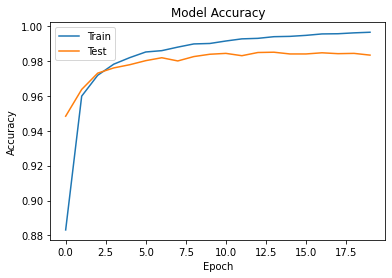

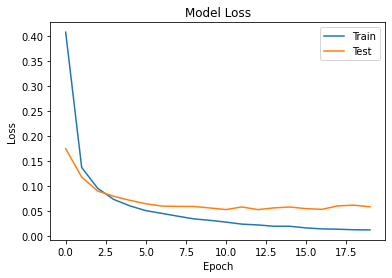

In [11]:
#Now, we want to plot our accuracy and loss for both our validation and training datasets
#This code was provided by my Surestart mentor

#Accuracy Curve
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig('acc1.png')
plt.show()

#Loss Curve
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig('loss1.png')
plt.show()


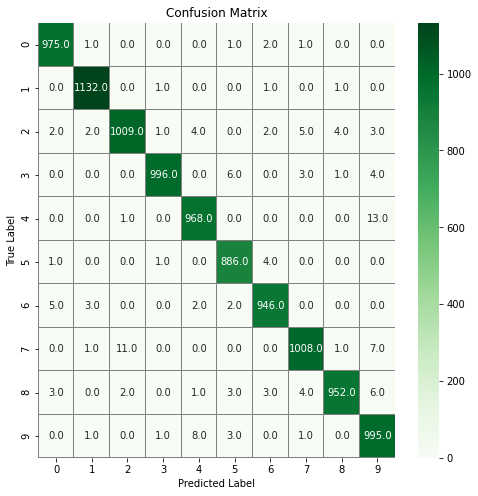

In [17]:
#Finally, we want to build a confusion matrix
#We'll use this matrix to evaluate how the model does at predicting our test dataset

#first, we'll print out the model's accuracy on the test dataset
acc = model.evaluate(testX_norm, test_y, verbose=0)

# Predict the values from the test dataset
Y_pred = model.predict(testX_norm)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert test observations to one hot vectors
Y_true = np.argmax(test_y,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()